In [1]:
import gymnasium as gym
import highway_env
import numpy as np
from stable_baselines3 import PPO
from stable_baselines3.common.noise import NormalActionNoise

# Create the environment
env = gym.make("highway-v1")

# Wrap the environment
env.reset()

(array([[ 1.        ,  0.88838214,  0.5       ,  0.3125    ,  0.        ],
        [ 1.        ,  0.10798978,  0.25      , -0.02715774,  0.        ],
        [ 1.        ,  0.212318  ,  0.25      , -0.02911737,  0.        ],
        [ 1.        ,  0.31358114,  0.25      , -0.021536  ,  0.        ],
        [ 1.        ,  0.42216358,  0.25      , -0.01410117,  0.        ]],
       dtype=float32),
 {'speed': 25,
  'crashed': False,
  'action': 4,
  'rewards': {'collision_reward': 0.0,
   'right_lane_reward': 0.6666666666666666,
   'high_speed_reward': 0.8333333333333334,
   'on_road_reward': 1.0,
   'reverse_reward': 0.0,
   'stopping_penalty': 0}})

In [2]:
# Create the SAC model
model = PPO(
    "MlpPolicy",
    env,
    learning_rate=0.0003,
    policy_kwargs=dict(net_arch=[dict(pi=[256, 256], vf=[256, 256])]),
    batch_size=64,
    gamma=0.9,
    verbose=1,
    tensorboard_log="ppo_highway_tensorboard"
)

# Train the model
model.learn(total_timesteps=20000,tb_log_name = 'PPO_1')

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


c:\Users\quynh\AppData\Local\Programs\Python\Python312\Lib\site-packages\stable_baselines3\common\policies.py:486: UserWarning: As shared layers in the mlp_extractor are removed since SB3 v1.8.0, you should now pass directly a dictionary and not a list (net_arch=dict(pi=..., vf=...) instead of net_arch=[dict(pi=..., vf=...)])
  warnings.warn(


Logging to ppo_highway_tensorboard\PPO_1_1
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 12.9     |
|    ep_rew_mean     | 10.2     |
| time/              |          |
|    fps             | 3        |
|    iterations      | 1        |
|    time_elapsed    | 561      |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 20.1        |
|    ep_rew_mean          | 16.3        |
| time/                   |             |
|    fps                  | 3           |
|    iterations           | 2           |
|    time_elapsed         | 1130        |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.016249381 |
|    clip_fraction        | 0.261       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.59       |
|    explained_variance   | 0

In [4]:
model.learn(total_timesteps=20000,tb_log_name = 'PPO_1',reset_num_timesteps=False)

Logging to ppo_highway_tensorboard\PPO_1_1
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 38.3     |
|    ep_rew_mean     | 33.4     |
| time/              |          |
|    fps             | 4        |
|    iterations      | 1        |
|    time_elapsed    | 485      |
|    total_timesteps | 22528    |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 37.6        |
|    ep_rew_mean          | 33          |
| time/                   |             |
|    fps                  | 4           |
|    iterations           | 2           |
|    time_elapsed         | 974         |
|    total_timesteps      | 24576       |
| train/                  |             |
|    approx_kl            | 0.029495802 |
|    clip_fraction        | 0.206       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.11       |
|    explained_variance   | 0

In [3]:
# Save the trained model
model.save("PPO_highwayv1")

In [2]:
model = PPO.load("PPO_highwayv1")

Testing TD3 Model on Highway-v0 Environment
Episode 1: Reward = 35.16, Length = 40 timesteps, Crash: False
Episode 2: Reward = 29.89, Length = 40 timesteps, Crash: False
Episode 3: Reward = 33.16, Length = 40 timesteps, Crash: False
Episode 4: Reward = 32.74, Length = 40 timesteps, Crash: False
Episode 5: Reward = 35.16, Length = 40 timesteps, Crash: False
Episode 6: Reward = 35.16, Length = 40 timesteps, Crash: False
Episode 7: Reward = 30.32, Length = 40 timesteps, Crash: False
Episode 8: Reward = 34.49, Length = 40 timesteps, Crash: False
Episode 9: Reward = 34.68, Length = 40 timesteps, Crash: False
Episode 10: Reward = 35.16, Length = 40 timesteps, Crash: False
Episode 11: Reward = 33.40, Length = 40 timesteps, Crash: False
Episode 12: Reward = 30.32, Length = 40 timesteps, Crash: False
Episode 13: Reward = 34.62, Length = 40 timesteps, Crash: False
Episode 14: Reward = 34.56, Length = 40 timesteps, Crash: False
Episode 15: Reward = 33.95, Length = 40 timesteps, Crash: False
Episo

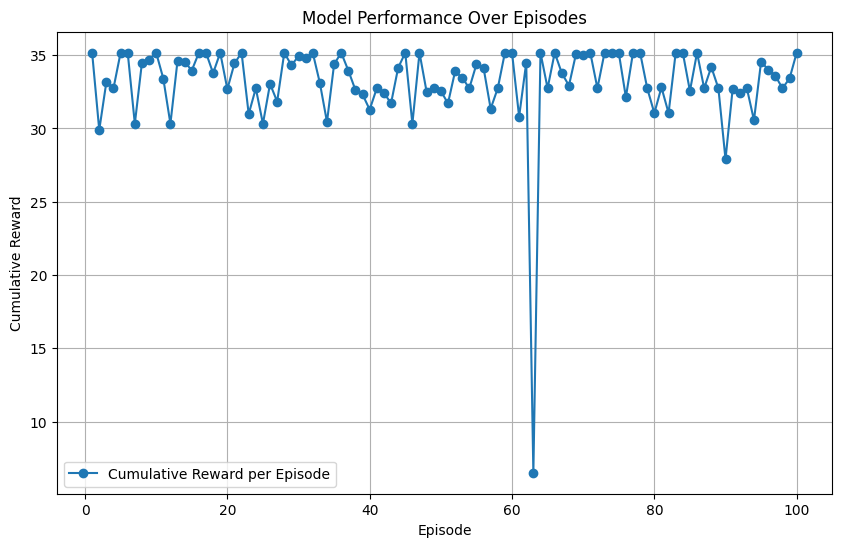

In [4]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

timestep_rewards = []
cumulative_rewards = []
episode_lengths = []
crashes = 0  # Track number of crashes
timesteps = []

# Run the trained model for testing
current_timestep = 0
total_episodes = 100

print("Testing TD3 Model on Highway-v0 Environment")

for episode in range(total_episodes):  
    done = truncated = False
    obs, info = env.reset()
    total_reward = 0
    episode_length = 0
    episode_crash = False  # Track crash per episode

    while not (done or truncated):
        action, _states = model.predict(obs, deterministic=True)
        obs, reward, done, truncated, info = env.step(action)

        # Accumulate rewards and track timesteps
        total_reward += reward
        current_timestep += 1
        episode_length += 1
        env.render()

        # Check if a crash occurred
        if info.get("crashed", False):
            episode_crash = True

        # Log timestep data
        timestep_rewards.append(reward)
        timesteps.append(current_timestep)

    # Update statistics
    cumulative_rewards.append(total_reward)
    episode_lengths.append(episode_length)
    crashes += int(episode_crash)  # Count if the episode had a crash

    print(f"Episode {episode + 1}: Reward = {total_reward:.2f}, Length = {episode_length} timesteps, Crash: {episode_crash}")

env.close()

# Compute statistics
mean_reward = sum(cumulative_rewards) / total_episodes
mean_episode_length = sum(episode_lengths) / total_episodes
crash_rate = crashes / total_episodes  # Percentage of episodes with crashes

print(f"\nMean Reward: {mean_reward:.2f}")
print(f"Mean Episode Length: {mean_episode_length:.2f}")
print(f"Crash Rate: {crash_rate:.2%}")

# Cumulative Rewards Plot
episodes = range(1, len(cumulative_rewards) + 1)
plt.figure(figsize=(10, 6))
plt.plot(episodes, cumulative_rewards, marker='o', label="Cumulative Reward per Episode")
plt.xlabel("Episode")
plt.ylabel("Cumulative Reward")
plt.title("Model Performance Over Episodes")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# # Load the pre-trained DQN model
# model = DQN.load("DQN_highwayv1")

# # Create the highway-v1 environment
# env = gym.make("highway-v1", render_mode="rgb_array")  # Ensure highway-v1 is registered

# Number of test episodes
n_episodes = 50

# Exponential delay parameters
scale = 1.2  # Mean delay
max_delay = 2  # Maximum delay in seconds

# Tracking performance metrics
cumulative_rewards = []
episode_lengths = []
crashes = 0  # Track number of crashes

# Run testing loop
for episode in range(n_episodes):
    obs, info = env.reset()
    total_reward = 0
    done = False
    episode_length = 0
    episode_crash = False  # Track crash per episode

    # Generate a random delay from an exponential distribution, capped at max_delay
    random_delay = min(np.random.exponential(scale), max_delay)

    while not done:
        action, _ = model.predict(obs, deterministic=True)

        # Apply the computation delay before executing the action
        env.unwrapped.elapse(random_delay)

        obs, reward, terminated, truncated, info = env.step(action)
        total_reward += reward
        episode_length += 1
        done = terminated or truncated

        # Check if a crash occurred
        if info.get("crashed", False):
            episode_crash = True

    # Update statistics
    cumulative_rewards.append(total_reward)
    episode_lengths.append(episode_length)
    crashes += int(episode_crash)  # Count if the episode had a crash

    print(f"Episode {episode + 1}: Delay = {random_delay:.2f}s, "
          f"Total Reward = {total_reward:.2f}, Length = {episode_length} timesteps, Crash: {episode_crash}")

env.close()

# Compute statistics
mean_reward = sum(cumulative_rewards) / n_episodes
mean_episode_length = sum(episode_lengths) / n_episodes
crash_rate = crashes / n_episodes  # Percentage of episodes with crashes

print(f"\nMean Reward: {mean_reward:.2f}")
print(f"Mean Episode Length: {mean_episode_length:.2f}")
print(f"Crash Rate: {crash_rate:.2%}")
